#  An Exercise on Simulating Event Sequences

When a basketball player makes several baskets in succession, they are describe as having a "hot hand". 

Let's learn how to simulate shooting streaks in R, and to compare a simulation to actual data in order to determine if the hot hand phenomenon appears to be real.

Our investigation will focus on the performance of one player: Kobe Bryant of the Los Angeles Lakers.

His performance against the Orlando Magic in the 2009 NBA finals earned him the title “Most Valuable Player” and many spectators commented on how he appeared to show a hot hand. 

Let's load some data from those games and look at the first several rows.

In [1]:
# Load the data frame

load(url("http://assets.datacamp.com/course/dasi/kobe.RData"))

# Inspect your data
nrow(kobe)
head(kobe)
tail(kobe)

[1] 133

vs,game,quarter,time,description,basket
ORL,1,1,9:47,Kobe Bryant makes 4-foot two point shot,H
ORL,1,1,9:07,Kobe Bryant misses jumper,M
ORL,1,1,8:11,Kobe Bryant misses 7-foot jumper,M
ORL,1,1,7:41,Kobe Bryant makes 16-foot jumper (Derek Fisher assists),H
ORL,1,1,7:03,Kobe Bryant makes driving layup,H
ORL,1,1,6:01,Kobe Bryant misses jumper,M


,vs,game,quarter,time,description,basket
128,ORL,3,4,3:57,Bryant Jump Shot: Made (28 PTS),H
129,ORL,3,4,3:33,Bryant Layup Shot: Missed,M
130,ORL,3,4,2:02,Bryant 3pt Shot: Missed,M
131,ORL,3,4,00:23.9,Bryant 3pt Shot: Missed,M
132,ORL,3,4,00:06.9,Bryant 3pt Shot: Missed,M
133,ORL,3,4,00:00.5,Bryant Layup Shot: Made (31 PTS),H


In [2]:
# Print the variable names of the data frame.
names(kobe)

# Print the first 9 values of the basket variable
head(kobe$basket, 9)

# or, 
kobe$basket[1:9]

[1] "vs"          "game"        "quarter"     "time"        "description"
[6] "basket"

[1] "H" "M" "M" "H" "H" "M" "M" "M" "M"

[1] "H" "M" "M" "H" "H" "M" "M" "M" "M"

Let's define the length of a shooting streak to be the number of consecutive baskets made until a miss occurs.

For example, in Game 1 Kobe had the following sequence of hits and misses from his nine shot attempts in the first quarter:

H M | M | H H M | M | M | M.

To start the first analysis, let's look at the distribution of the shooting streaks. 

Along with the data frame,  the custom function calc_streak() is also loaded into the workspace.

We'll use this function to calculate the lengths of all shooting streaks and 
then look at the distribution with a barplot.

Note that a bar plot is preferable to a histogram here since our variable is discrete (we're dealing with counts) instead of continuous.

[1] 1 0 2 0 0 0 3 2 0 3 0 1 3 0 0 0 0 0 1 1 0 4 1 0 1 0 1 0 1 2 0 1 2 1 0 0 1 0
[39] 0 0 1 1 0 1 0 2 0 0 0 3 0 1 0 1 2 1 0 1 0 0 1 3 3 1 1 0 0 0 0 0 1 1 0 0 0 1

kobe_streak
 0  1  2  3  4 
39 24  6  6  1 

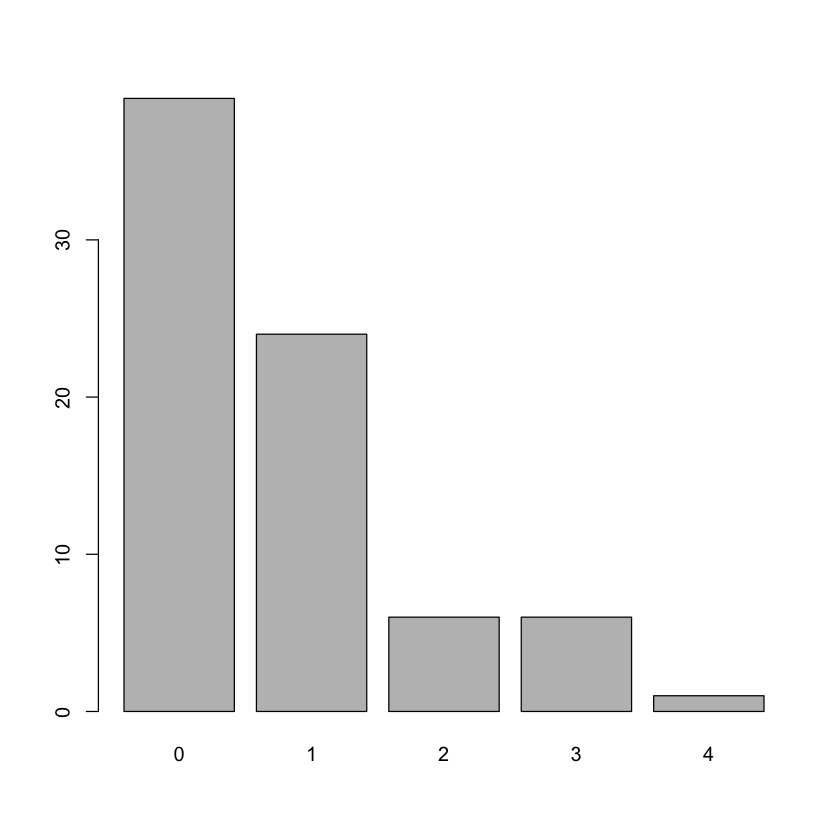

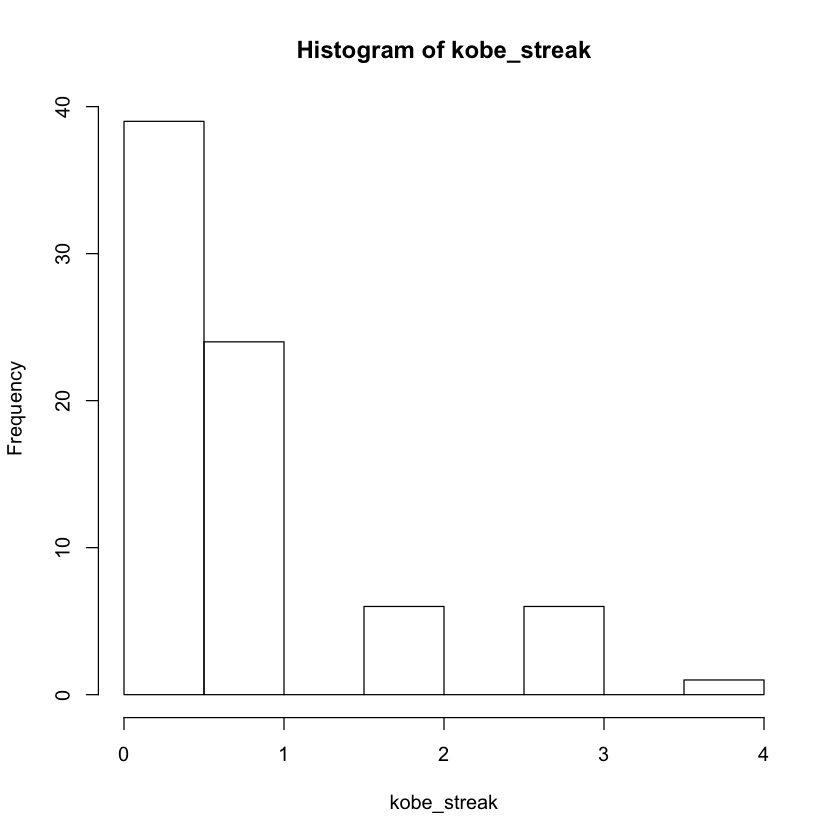

In [3]:
# Assign Kobe's streak lengths:
calc_streak(kobe$basket)
kobe_streak <- calc_streak(kobe$basket)

# Draw a barplot of the result:
table(kobe_streak)
barplot(table(kobe_streak))

# in continuous cases, histogram is a better option; not in our case.

hist(kobe_streak)

See, the distribution of Kobe's streaks is unimodal and left skewed.

We've shown that Kobe had some long shooting streaks, but are they long enough to support the belief that he had hot hands? 

What can we compare them to?

If Kobe's shooting streaks diverge significantly from an independent shooter's streaks, we can conclude that Kobe likely has a hot hand.


So the key is to compare Kobe's data with that of a shooter who we know to have independent shots.

While we don't have any such data, that is very easy to simulate in R.

In a simulation, you set the ground rules of a random process and then the computer uses random numbers to generate an outcome that adheres to those rules. 

As a simple example, you can simulate flipping a fair coin with the following commands.

In [ ]:
# Try some simulations!
outcomes <- c("heads", "tails")
sample(outcomes, size = 1, replace = TRUE)

# one more flip
sample(outcomes, size = 1, replace = TRUE)

Let's flip 100 coins!

In [4]:
# Run the simulation:
outcomes <- c("heads", "tails")
sim_fair_coin <- sample(outcomes, 100, TRUE)

# Print the object:
sim_fair_coin

# Compute the counts of heads and tails:
table(sim_fair_coin)

[1] "heads" "tails" "heads" "heads" "heads" "tails" "heads" "heads" "tails"
 [10] "tails" "heads" "heads" "heads" "heads" "heads" "heads" "tails" "tails"
 [19] "heads" "heads" "tails" "tails" "tails" "tails" "heads" "heads" "tails"
 [28] "tails" "tails" "tails" "heads" "heads" "heads" "heads" "heads" "tails"
 [37] "tails" "tails" "heads" "heads" "heads" "tails" "heads" "heads" "tails"
 [46] "heads" "tails" "tails" "tails" "heads" "heads" "tails" "tails" "tails"
 [55] "heads" "heads" "heads" "heads" "tails" "tails" "heads" "tails" "tails"
 [64] "heads" "heads" "heads" "heads" "heads" "heads" "tails" "tails" "tails"
 [73] "heads" "tails" "heads" "tails" "tails" "heads" "heads" "tails" "heads"
 [82] "tails" "heads" "tails" "tails" "heads" "tails" "heads" "tails" "heads"
 [91] "tails" "heads" "tails" "heads" "tails" "heads" "tails" "tails" "tails"
[100] "heads"

sim_fair_coin
heads tails 
   53    47 

What about flipping an unfair coin?

In [ ]:
# Run the simulation:
outcomes <- c("heads", "tails")
sim_unfair_coin <-  sample(outcomes, 100, prob=c(0.2, 0.8), replace=TRUE)

# Print the object:
sim_unfair_coin

# Compute the counts of heads and tails:
table(sim_unfair_coin)

Simulating a basketball player who has independent shots uses the same mechanism that we used to simulate a coin flip. 

To simulate a single shot from an independent shooter with a shooting percentage of 50% we type, 

In [5]:
# Run the simulation and assign the result to sim_basket.

outcomes <- c("H", "M") 

# Here, H is for "Hit", M is for "Miss"

sample(outcomes, size = 1, replace = TRUE)

[1] "H"

Run a simulation to sample 133 shots (the number of shots of Kobe in this data set) with a shooting percentage of 45%. 

Assign the output of this simulation to a new object called sim_basket

In [9]:
sim_basket <- sample(outcomes, size = 133, prob=c(0.45,0.55),replace = TRUE)

# Inspect your simulation
table(sim_basket)

sim_basket
 H  M 
57 76 

With the results of the simulation saved as sim_basket, you have the data you need to compare Kobe to your independent shooter. 

We can look at Kobe's data alongside our simulated data: kobe$basket vs. sim_basket.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.7632  1.0000  4.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.7403  1.0000  4.0000 

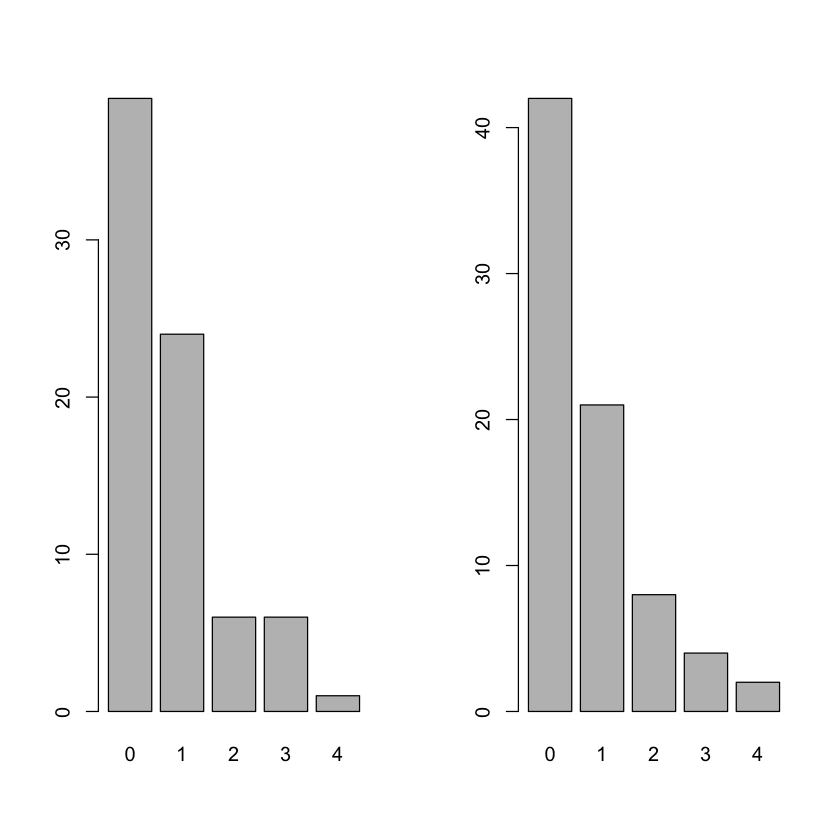

In [10]:
# Calculate streak lengths:
kobe_streak <- calc_streak(kobe$basket)
sim_streak <- calc_streak(sim_basket)

# Compute summaries:
summary(kobe_streak)
summary(sim_streak)

# Make bar plots:
kobe_table <- table(kobe_streak)
sim_table <- table(sim_streak)

par(mfrow=c(1,2))
barplot(kobe_table)
barplot(sim_table)


Since Kobe's streak length distribution looks very similar to the independent shooter's simulated steak length distribution, we can conclude that Kobe Bryant likely does not have a "hot hand".


# An Exercise on Basic Statistical Inference

We consider real estate data from the city of Ames, Iowa. 

Our particular focus for this lab will be all residential home sales in Ames between 2006 and 2010. 

This collection represents our population of interest (which is rare to have access to),
but we will also work with smaller samples from this population.

In [11]:
# Load the ames data frame:
load(url("http://s3.amazonaws.com/assets.datacamp.com/course/dasi/ames.RData"))

# Make some preliminary inspections:
names(ames)
head(ames)
tail(ames)

[1] "Order"           "PID"             "MS.SubClass"     "MS.Zoning"      
 [5] "Lot.Frontage"    "Lot.Area"        "Street"          "Alley"          
 [9] "Lot.Shape"       "Land.Contour"    "Utilities"       "Lot.Config"     
[13] "Land.Slope"      "Neighborhood"    "Condition.1"     "Condition.2"    
[17] "Bldg.Type"       "House.Style"     "Overall.Qual"    "Overall.Cond"   
[21] "Year.Built"      "Year.Remod.Add"  "Roof.Style"      "Roof.Matl"      
[25] "Exterior.1st"    "Exterior.2nd"    "Mas.Vnr.Type"    "Mas.Vnr.Area"   
[29] "Exter.Qual"      "Exter.Cond"      "Foundation"      "Bsmt.Qual"      
[33] "Bsmt.Cond"       "Bsmt.Exposure"   "BsmtFin.Type.1"  "BsmtFin.SF.1"   
[37] "BsmtFin.Type.2"  "BsmtFin.SF.2"    "Bsmt.Unf.SF"     "Total.Bsmt.SF"  
[41] "Heating"         "Heating.QC"      "Central.Air"     "Electrical"     
[45] "X1st.Flr.SF"     "X2nd.Flr.SF"     "Low.Qual.Fin.SF" "Gr.Liv.Area"    
[49] "Bsmt.Full.Bath"  "Bsmt.Half.Bath"  "Full.Bath"       "Half.Bath"      
[53] "Bedroom.AbvGr"   "Kitchen.AbvGr"   "Kitchen.Qual"    "TotRms.AbvGrd"  
[57] "Functional"      "Fireplaces"      "Fireplace.Qu"    "Garage.Type"    
[61] "Garage.Yr.Blt"   "Garage.Finish"   "Garage.Cars"     "Garage.Area"    
[65] "Garage.Qual"     "Garage.Cond"     "Paved.Drive"     "Wood.Deck.SF"   
[69] "Open.Porch.SF"   "Enclosed.Porch"  "X3Ssn.Porch"     "Screen.Porch"   
[73] "Pool.Area"       "Pool.QC"         "Fence"           "Misc.Feature"   
[77] "Misc.Val"        "Mo.Sold"         "Yr.Sold"         "Sale.Type"      
[81] "Sale.Condition"  "SalePrice"

Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,⋯,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
1,526301100,20,RL,141,31770,Pave,NA,IR1,Lvl,⋯,0,NA,NA,NA,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80,11622,Pave,NA,Reg,Lvl,⋯,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81,14267,Pave,NA,IR1,Lvl,⋯,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93,11160,Pave,NA,Reg,Lvl,⋯,0,NA,NA,NA,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74,13830,Pave,NA,IR1,Lvl,⋯,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
6,527105030,60,RL,78,9978,Pave,NA,IR1,Lvl,⋯,0,NA,NA,NA,0,6,2010,WD,Normal,195500


,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,⋯,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
2925,2925,923251180,20,RL,160,20000,Pave,NA,Reg,Lvl,⋯,0,NA,NA,NA,0,9,2006,WD,Abnorml,131000
2926,2926,923275080,80,RL,37,7937,Pave,NA,IR1,Lvl,⋯,0,NA,GdPrv,NA,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,NA,8885,Pave,NA,IR1,Low,⋯,0,NA,MnPrv,NA,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62,10441,Pave,NA,Reg,Lvl,⋯,0,NA,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77,10010,Pave,NA,Reg,Lvl,⋯,0,NA,NA,NA,0,4,2006,WD,Normal,170000
2930,2930,924151050,60,RL,74,9627,Pave,NA,Reg,Lvl,⋯,0,NA,NA,NA,0,11,2006,WD,Normal,188000


Restrict our attention to just the variable: "Gr.Liv.Area", the above ground living area of the house in square feet.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    334    1126    1442    1500    1743    5642 

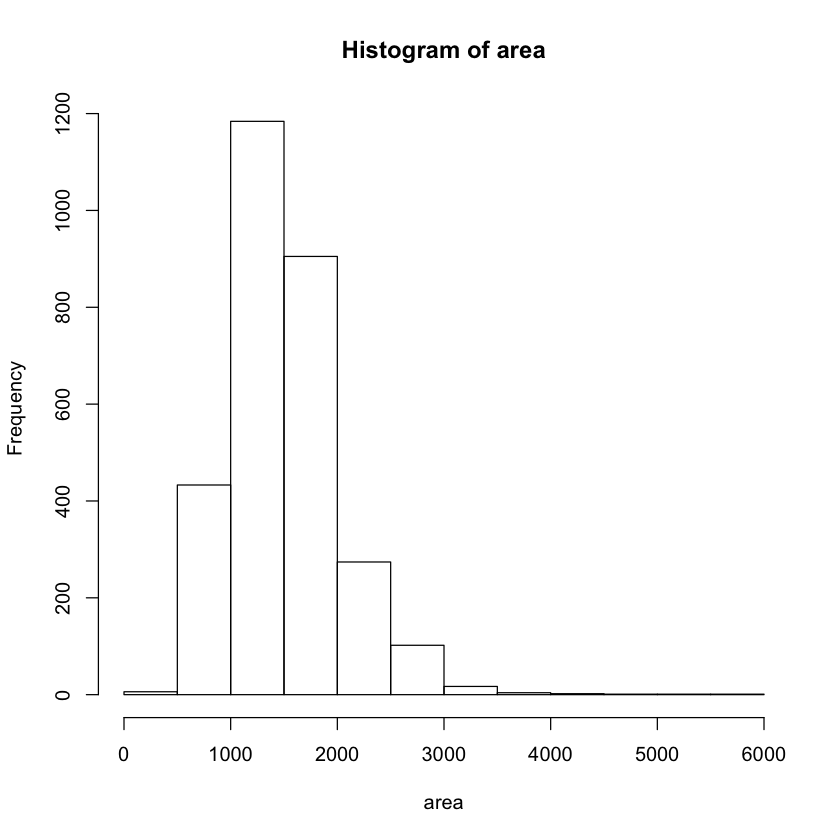

In [12]:
# Assign the variables:
area <- ames$Gr.Liv.Area

# Calculate the summary and draw a histogram of area
hist(area)
summary(area)

Let's interpret the results above by answering this question:

    Which one is the FALSE?

    a) The distribution of areas of houses in Ames is unimodal and right-skewed.

    b) 50% of houses in Ames are smaller than 1,500 square feet.

    c) The middle 50% of the houses range between approximately 1,130 square feet and 1,740 square feet.

    d) The IQR is approximately 610 square feet.

    e) The smallest house is 334 square feet and the largest is 5,642 square feet.


# Sampling from the population

We have access to the entire population, but this is rarely the case in real life. 

Gathering information on an entire population is often extremely costly or impossible. 

Because of this, we often take a sample of the population and use that to understand the properties of the population.

This command collects a simple random sample of size 50 from the vector area. 

This is like going into the City Assessor's database and pulling up the files on 50 random home sales. 

If we didn't have access to the population data, working with these 50 files would be considerably simpler than having to go through all 2930 home sales.

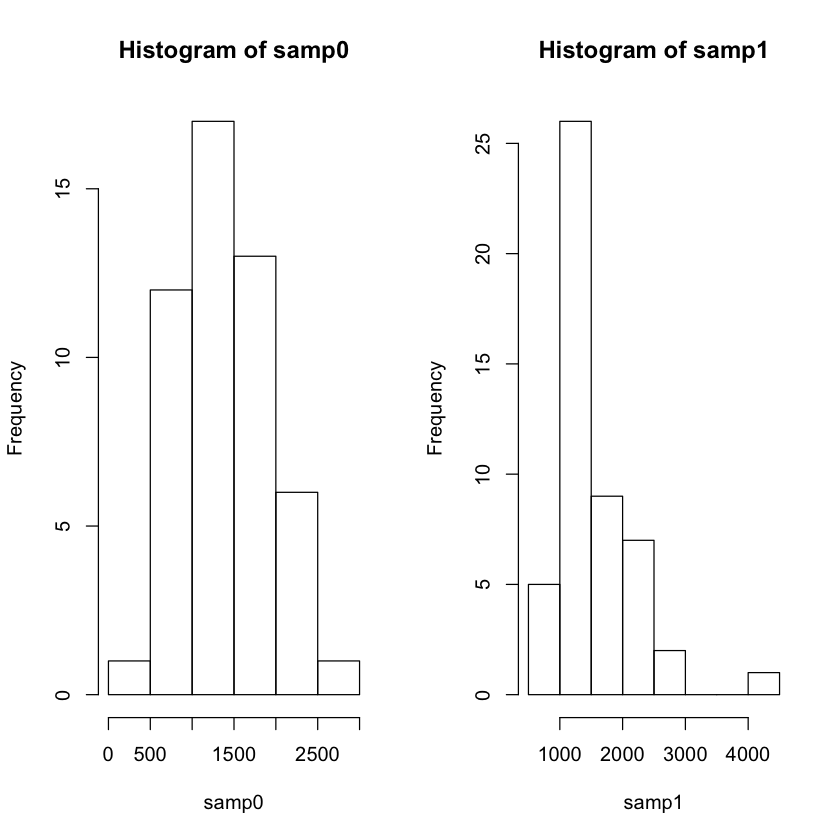

In [13]:
# Create the samples:
samp0 <- sample(area, 50)
samp1 <- sample(area, 50)

# Compare these two samples by by drawing the histograms:
par(mfrow=c(1,2))
hist(samp0)
hist(samp1)

Check the mean values of the estimetes: 

Depending on which 50 homes you selected, your estimate could be a bit above or a bit below the true population mean of approximately 1,500 square feet. 

In [14]:
mean(samp0)
mean(samp1)

[1] 1391.44

[1] 1582.5

Not surprisingly, every time we take another random sample, we get a different sample mean. 

It's useful to get a sense of just how much variability we should expect when estimating the population mean this way.

The distribution of sample means, called the sampling distribution, can help us understand this variability.

Let's build up the sampling distribution for the sample mean by repeating the above steps many times. Here we will generate 5000 samples and compute the sample mean of each.

The code in the editor takes 5000 samples of size 50 from the population, calculates the mean of each sample, and stores each result in a vector called "sample_means50"

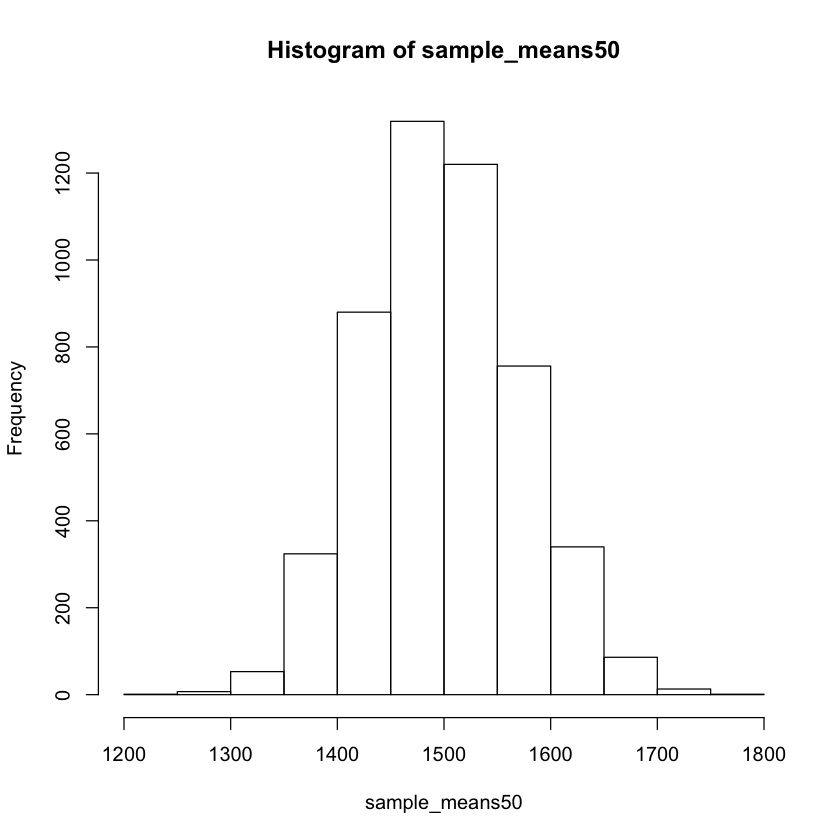

In [15]:
# Set up an empty vector of 5000 NAs to store sample means:
sample_means50 <- rep(NA, 5000)

# Take 5000 samples of size 50 of area and store all of them in sample_means50.
for (i in 1:5000) {
  samp <- sample(area, 50)
  sample_means50[i] <- mean(samp)
}

# View the result. If you want, you can increase the bin width to show more detail by changing the breaks argument.
hist(sample_means50, breaks = 13)

Let's see what the effect is of the sample size on our distribution.

Take a look at the code. In total we create three sampling stributions, sample_means10, sample_means50 and sample_means100.

In [16]:
# Initialize the sample distributions:
sample_means10 <- rep(NA, 5000)
sample_means50 <- rep(NA, 5000)
sample_means100 <- rep(NA, 5000)

# Run the for loop:
for (i in 1:5000) {
    samp <- sample(area, 10)
    sample_means10[i] <- mean(samp)
    samp <- sample(area, 50)
    sample_means50[i] <- mean(samp)
    samp <- sample(area, 100)
    sample_means100[i] <- mean(samp)
}

# Take a look at the results:
head(sample_means10)
head(sample_means50)
head(sample_means100)

[1] 1483.3 1411.6 1871.8 1424.2 1259.5 1420.6

[1] 1493.98 1413.88 1623.76 1422.68 1625.10 1496.06

[1] 1397.12 1439.43 1487.87 1469.84 1428.35 1572.35

To see the effect that different sample sizes have on the sampling distribution, let's plot the three distributions on top of one another.

In R you can plot all three of them on the same graph by specifying that you'd like to divide the plotting area into three rows and one column of plots. You do this with the following command:

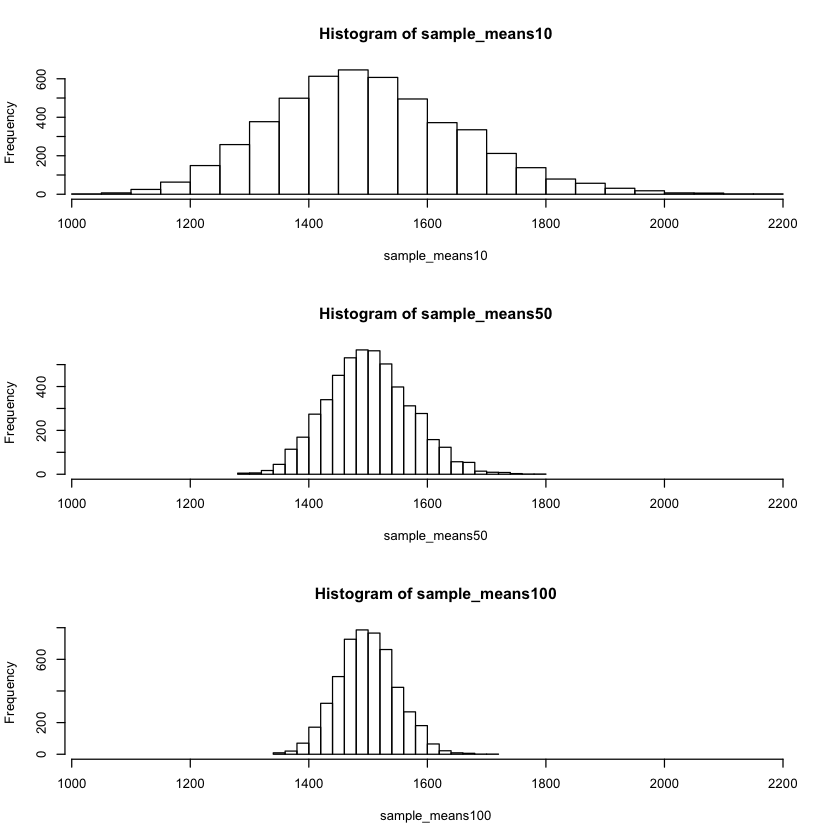

In [17]:
# Divide the plot in 3 rows:
par(mfrow = c(3, 1))

# Define the limits for the x-axis:
xlimits <- range(sample_means10)

# Draw the histograms:
hist(sample_means10, breaks=20, xlim=xlimits)
hist(sample_means50, breaks=20, xlim=xlimits)
hist(sample_means100, breaks=20, xlim=xlimits)

It makes intuitive sense that as the sample size increases, the center of the sampling distribution becomes a more reliable estimate for the true population mean. Also as the sample size increases, the variability of the sampling distribution decreases.

____________________________________________________________

    Source for this material:

    https://campus.datacamp.com/courses/statistical-inference-and-data-analysis/lab-2-probability?ex=1

    https://campus.datacamp.com/courses/statistical-inference-and-data-analysis/lab-3a-foundations-for-inference-sampling-distributions?ex=1

    You can try each step yourself using these links.